# Bogazici AI Assignment1


In [24]:
#importing the neccessary libs
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
#getting to know the data
df = pd.read_csv('real_estate.csv')
df.head(20)

,No,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude,housepriceofunitarea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [26]:
#detecting null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    414 non-null    int64  
 1   transactiondate       414 non-null    float64
 2   houseage              414 non-null    float64
 3   distancetostation     414 non-null    float64
 4   numberofstores        414 non-null    int64  
 5   latitude              414 non-null    float64
 6   longitude             414 non-null    float64
 7   housepriceofunitarea  414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Explarotory Data Analysis

In [27]:
#visualization location on map.
start_location = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location = start_location, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(map)

for _, row in df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                       radius = 5).add_to(marker_cluster)
    
map

According to map data, 205 of the houses are close to each other in location. And all the houses are at Taiwan. 

Text(0.5, 1.0, 'Correlation Matrix')

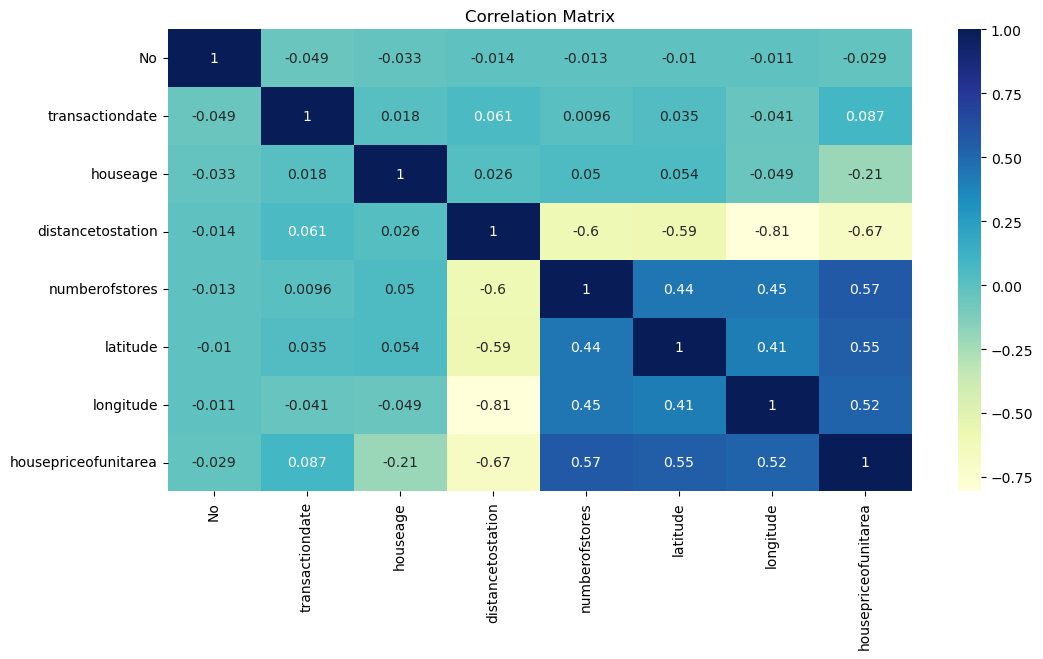

In [5]:
#correlation heatmap of all features
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')

Latitude,Longtitude and distancetostation are negatively correlated. But it doesnt make any sense so ill drop it after training raw.


Text(0, 0.5, 'Unit Area Price ($)')

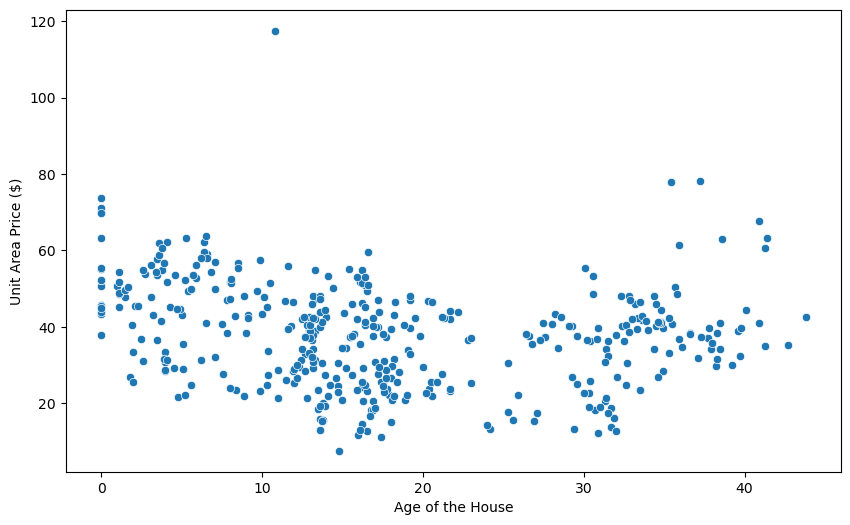

In [6]:
#house age and price per unit scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'houseage', y='housepriceofunitarea', data=df)
plt.xlabel('Age of the House')
plt.ylabel('Unit Area Price ($)')


Prices increase with age, but this is not very noticeable


### Part 1


In [30]:
X = df.drop('housepriceofunitarea', axis=1)
y = df['housepriceofunitarea']

#splitting data into train and test.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

#training
model = LinearRegression()
model.fit(Xtrain, ytrain)

y_prediction = model.predict(Xtest)

# measurement
mse = mean_squared_error(ytest,y_prediction)
r2 = r2_score(ytest, y_prediction)
print("MSE:", mse)
print("R2:", r2)

MSE: 54.60196067337511
R2: 0.6745228670350991


In [9]:
#Dropping the unnec columns
will_be_dropped = ['longitude', 'latitude']
df = df.drop(will_be_dropped, axis = 1)


X = df.drop('housepriceofunitarea', axis=1)
y = df['housepriceofunitarea']

#splitting data into train and test.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

#training
model = LinearRegression()
model.fit(Xtrain, ytrain)

y_prediction = model.predict(Xtest)
mse = mean_squared_error(ytest,y_prediction)
r2 = r2_score(ytest, y_prediction)
print("MSE:", mse)
print("R2:", r2)


MSE: 57.92394899590021
R2: 0.6547208082514193


mse increased
r2 decreased so im not going to use this method

### Part 2

In [10]:
X_with_bias = np.c_[np.ones((Xtrain.shape[0], 1)), Xtrain]
theta = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(ytrain)
X_test_with_bias = np.c_[np.ones((Xtest.shape[0], 1)), Xtest]
y_pred = np.dot(X_test_with_bias, theta)
y_pred

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


array([48.73007164, 41.82771238, 41.89278729, 38.11723836, 25.99476573,
       46.07443939, 42.38215329, 45.00427849, 28.4571198 , 55.81102181,
       34.49487344, 36.66149674, 31.59886807, 28.1928475 , 34.28332648,
       33.08050912, 45.24828623, 48.65758847, 28.97827527, 46.59451208,
        0.54421954, 35.48844605, 45.67140116, 48.16815341, 13.46086793,
       37.51852179, 14.51801157, 42.29781654, 37.77533031, 35.56823746,
       14.64624617, 38.68440675, 38.31784536, 32.27129125, 46.64473651,
       30.36008125, 50.77403739, 14.91653822, 47.9829833 , 39.87326782,
       37.45002026, 39.49328219, 47.21167054, 34.87188288, 40.95336674,
       47.30176781, 44.59615909, 23.14268519, 48.48342303, 43.19997581,
       50.06856104, 46.24137075, 40.22355649, 42.61419652, 36.77590316,
       18.028004  , 40.21093767, 33.34514343, 28.76385368, 45.18446422,
       31.44507816, 31.01420631, 17.4958187 ,  9.0455382 ,  5.31292945,
       32.88969538, 33.3184269 , 49.04518954, 32.74010976, 35.54

In [196]:
mse = mean_squared_error(ytest,y_pred)
r2 = r2_score(ytest, y_pred)
print(mse)
r2

57.92394897479961


0.654720808377198

### Part3 

In [31]:
X = df.drop('housepriceofunitarea', axis = 1)
y = df['housepriceofunitarea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(ytest, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 41.99308082537776
R2: 0.7496832094882636
